In [1]:
%pip install pomegranate

^C
Note: you may need to restart the kernel to use updated packages.


C:\Users\andre\AppData\Local\Temp\ipykernel_48668\2222145193.py:35: UserWarning: Install pygraphviz for nicer visualizations
  model.plot(ax=ax, precision=2)


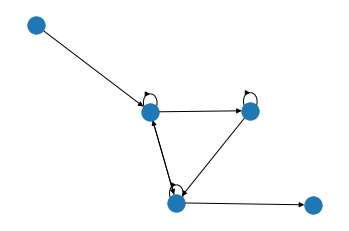

In [1]:
from pomegranate import HiddenMarkovModel, State, DiscreteDistribution
from matplotlib import pyplot as plt

def build_model():

    d1 = DiscreteDistribution({'A' : 0.50, 'B' : 0.50})
    d2 = DiscreteDistribution({'A' : 0.10, 'B' : 0.90})
    d3 = DiscreteDistribution({'A' : 0.90, 'B' : 0.10})

    s1 = State(d1, name="s1")
    s2 = State(d2, name="s2")
    s3 = State(d3, name="s3")

    model = HiddenMarkovModel(name='my model')
    model.add_states(s1, s2, s3)
    model.add_transition(model.start, s1, 1.0)
    model.add_transition(s1, s1, 0.7)
    model.add_transition(s1, s2, 0.3) # s1->s2
    model.add_transition(s2, s2, 0.8)
    
    model.add_transition(s2, s3, 0.0) # no transition from s2 to s3
    model.add_transition(s1, s3, 0.1) # indirect from s1 to s3
    model.add_transition(s3, s1, 0.1) # indirect from s3 to s1
    
    model.add_transition(s3, s3, 0.9)
    model.add_transition(s3, model.end, 0.1)
    model.start.name = 'start'
    model.end.name = 'end'
    model.bake()

    return model

model = build_model()
fig, ax = plt.subplots(1)
model.plot(ax=ax, precision=2)
fig.savefig('model.png')